## DATA EXPLORATION

#### Import required library

In [3]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import chi2_contingency
from sklearn.metrics import accuracy_score, confusion_matrix

#### Importing the dataset

In [5]:
df = pd.read_csv(r"C:\BIA\Capstone\Data\archive\Credit Score Classification Dataset.csv")

In [6]:
# Viewing the first 5 rows of the data

df.head()

,Age,Gender,Income,Education,Marital Status,Number of Children,Home Ownership,Credit Score
0,25,Female,50000,Bachelor's Degree,Single,0,Rented,High
1,30,Male,100000,Master's Degree,Married,2,Owned,High
2,35,Female,75000,Doctorate,Married,1,Owned,High
3,40,Male,125000,High School Diploma,Single,0,Owned,High
4,45,Female,100000,Bachelor's Degree,Married,3,Owned,High


In [7]:
# Viewing the last 5 rows of the data

df.tail()

,Age,Gender,Income,Education,Marital Status,Number of Children,Home Ownership,Credit Score
159,29,Female,27500,High School Diploma,Single,0,Rented,Low
160,34,Male,47500,Associate's Degree,Single,0,Rented,Average
161,39,Female,62500,Bachelor's Degree,Married,2,Owned,High
162,44,Male,87500,Master's Degree,Single,0,Owned,High
163,49,Female,77500,Doctorate,Married,1,Owned,High


In [8]:
# Viewing the sample of the data randomly with no perticular order

df.sample(5)

,Age,Gender,Income,Education,Marital Status,Number of Children,Home Ownership,Credit Score
126,30,Male,117500,Master's Degree,Married,2,Owned,High
57,49,Female,77500,Doctorate,Married,1,Owned,High
48,33,Male,52500,High School Diploma,Single,0,Rented,Average
65,45,Female,110000,Bachelor's Degree,Married,3,Owned,High
108,42,Male,110000,Master's Degree,Single,0,Owned,High


In [9]:
# Finding out the shape of the dataset

df.shape

(164, 8)

##### Our dataset has 164 rows and 8 columns

In [11]:
# Finding out the columns names and their data types

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164 entries, 0 to 163
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Age                 164 non-null    int64 
 1   Gender              164 non-null    object
 2   Income              164 non-null    int64 
 3   Education           164 non-null    object
 4   Marital Status      164 non-null    object
 5   Number of Children  164 non-null    int64 
 6   Home Ownership      164 non-null    object
 7   Credit Score        164 non-null    object
dtypes: int64(3), object(5)
memory usage: 10.4+ KB


##### We have a mixture of data types in our dataset. 5 of 8 columns are string objects and the rest are integer columns

#### Numerical columns

##### 1 - Age
##### 2 - Income
##### 3 - Number of children

#### Categorical columns

##### 1 - Gender
##### 2 - Education
##### 3 - Marital Status
##### 4 - Home Ownership
##### 5 - Credit Score

In [15]:
# Original column name 
df.columns

Index(['Age', 'Gender', 'Income', 'Education', 'Marital Status',
       'Number of Children', 'Home Ownership', 'Credit Score'],
      dtype='object')

In [16]:
# Standardising the column with lower case letters

df.columns = df.columns.str.lower()
df.columns

Index(['age', 'gender', 'income', 'education', 'marital status',
       'number of children', 'home ownership', 'credit score'],
      dtype='object')

In [17]:
# Replacing the space with underscore within the column name

df.columns = df.columns.str.replace(' ', '_')

In [18]:
df

,age,gender,income,education,marital_status,number_of_children,home_ownership,credit_score
0,25,Female,50000,Bachelor's Degree,Single,0,Rented,High
1,30,Male,100000,Master's Degree,Married,2,Owned,High
2,35,Female,75000,Doctorate,Married,1,Owned,High
3,40,Male,125000,High School Diploma,Single,0,Owned,High
4,45,Female,100000,Bachelor's Degree,Married,3,Owned,High
...,...,...,...,...,...,...,...,...
159,29,Female,27500,High School Diploma,Single,0,Rented,Low
160,34,Male,47500,Associate's Degree,Single,0,Rented,Average
161,39,Female,62500,Bachelor's Degree,Married,2,Owned,High
162,44,Male,87500,Master's Degree,Single,0,Owned,High


In [19]:
# Checing if there is any missing values in our data

df.isnull().sum()

age                   0
gender                0
income                0
education             0
marital_status        0
number_of_children    0
home_ownership        0
credit_score          0
dtype: int64

##### We do not have any null / missing values

In [21]:
## Checking if there is any duplicate values in our data
df.duplicated().sum()

62

In [22]:
# Droping the duplicate values

df.drop_duplicates(inplace=True)

In [23]:
df.shape

(102, 8)

##### After droping the duplicated we have 102 rows and 8 columns

In [25]:
# Getting the statistics summary
df.describe(include='all')

,age,gender,income,education,marital_status,number_of_children,home_ownership,credit_score
count,102.000000,102,102.000000,102,102,102.000000,102,102
unique,NaN,2,NaN,5,2,NaN,2,3
top,NaN,Female,NaN,Bachelor's Degree,Married,NaN,Owned,High
freq,NaN,52,NaN,28,58,NaN,73,75
mean,38.950980,NaN,88308.823529,NaN,NaN,0.656863,NaN,NaN
std,8.709136,NaN,32417.071969,NaN,NaN,0.895479,NaN,NaN
min,25.000000,NaN,25000.000000,NaN,NaN,0.000000,NaN,NaN
25%,31.000000,NaN,65000.000000,NaN,NaN,0.000000,NaN,NaN
50%,39.000000,NaN,86250.000000,NaN,NaN,0.000000,NaN,NaN
75%,46.750000,NaN,110000.000000,NaN,NaN,1.000000,NaN,NaN


In [26]:
# Exporting the cleaned csv for dashboarding
df.to_csv("C:\BIA\Capstone\Data\Cleaned csv\cleaned.csv")

<>:2: SyntaxWarning: invalid escape sequence '\B'
<>:2: SyntaxWarning: invalid escape sequence '\B'
C:\Users\skyna\AppData\Local\Temp\ipykernel_22584\2520605248.py:2: SyntaxWarning: invalid escape sequence '\B'
  df.to_csv("C:\BIA\Capstone\Data\Cleaned csv\cleaned.csv")


In [27]:
# Getting the unique values for all the columns

unique_values = {col: df[col].unique() for col in df.columns}

# Print the unique values for each column
for col, values in unique_values.items():
    print(f"\nUnique values in column '{col}': {values}")


Unique values in column 'age': [25 30 35 40 45 50 26 31 36 41 46 51 27 32 37 42 47 52 28 33 38 43 48 53
 29 34 39 44 49]

Unique values in column 'gender': ['Female' 'Male']

Unique values in column 'income': [ 50000 100000  75000 125000 150000  40000  60000  80000 105000  90000
 135000  35000  55000  70000  95000  85000  30000  65000 115000  25000
  45000 130000 155000 110000 140000  37500  57500  72500  32500  52500
  67500  92500  82500 122500  27500  47500  62500  87500  77500 112500
 117500 142500 160000  97500 145000 162500 120000 102500 137500 127500
  82000  68000]

Unique values in column 'education': ["Bachelor's Degree" "Master's Degree" 'Doctorate' 'High School Diploma'
 "Associate's Degree"]

Unique values in column 'marital_status': ['Single' 'Married']

Unique values in column 'number_of_children': [0 2 1 3]

Unique values in column 'home_ownership': ['Rented' 'Owned']

Unique values in column 'credit_score': ['High' 'Average' 'Low']


In [219]:
df[df['credit_score']== "High"]

,age,gender,income,education,marital_status,number_of_children,home_ownership,credit_score
0,25,Female,50000,Bachelor's Degree,Single,0,Rented,High
1,30,Male,100000,Master's Degree,Married,2,Owned,High
2,35,Female,75000,Doctorate,Married,1,Owned,High
3,40,Male,125000,High School Diploma,Single,0,Owned,High
4,45,Female,100000,Bachelor's Degree,Married,3,Owned,High
...,...,...,...,...,...,...,...,...
116,53,Male,127500,Associate's Degree,Married,0,Owned,High
129,33,Female,82000,Master's Degree,Married,1,Owned,High
130,31,Male,95000,Doctorate,Single,0,Rented,High
132,32,Male,85000,Master's Degree,Single,0,Rented,High


## EDA 

#### UNIVARIATE ANALYSIS

C:\Users\skyna\AppData\Local\Temp\ipykernel_22584\730261314.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['age'])


<Axes: xlabel='age', ylabel='Density'>

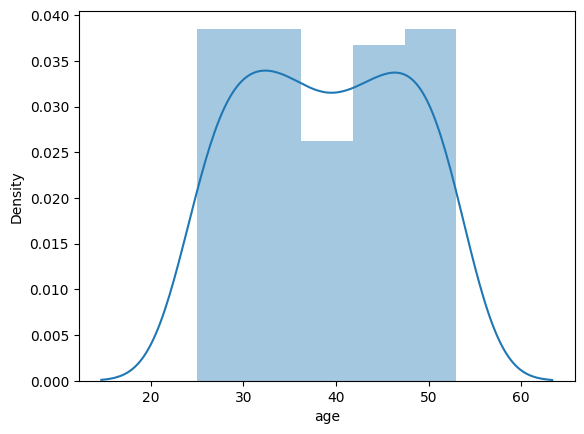

In [30]:
# Extracting PDF for all the columns to check the skeweeness
sns.distplot(df['age'])

C:\Users\skyna\AppData\Local\Temp\ipykernel_22584\168638058.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['number_of_children'])


<Axes: xlabel='number_of_children', ylabel='Density'>

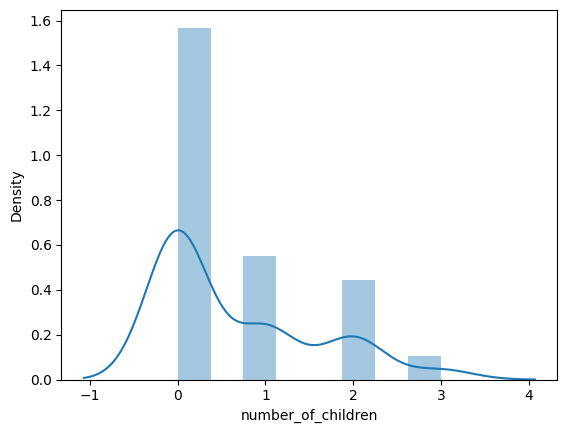

In [31]:
sns.distplot(df['number_of_children'])

C:\Users\skyna\AppData\Local\Temp\ipykernel_22584\3587660272.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['income'])


<Axes: xlabel='income', ylabel='Density'>

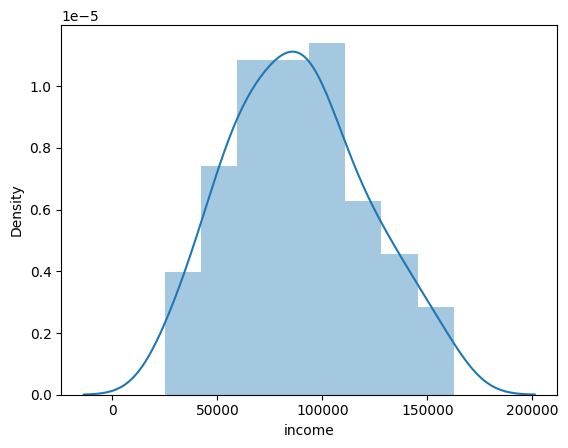

In [32]:
sns.distplot(df['income'])

<Axes: ylabel='age'>

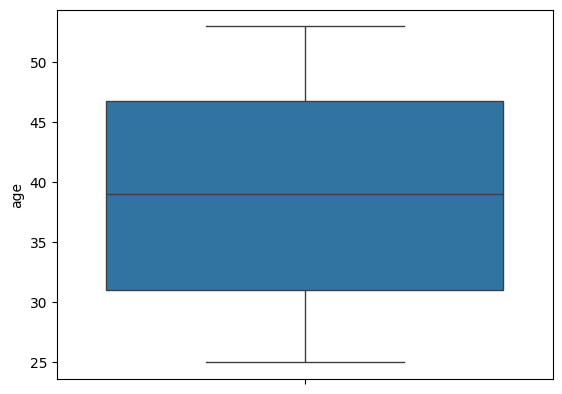

In [33]:
# Checking if there are any outliers 

sns.boxplot(df['age'])

##### We cannot see any potential outliers in age column

<Axes: ylabel='income'>

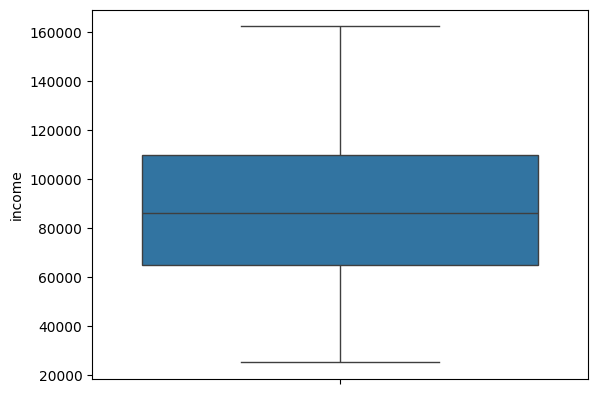

In [35]:
sns.boxplot(df['income'])

<Axes: ylabel='number_of_children'>

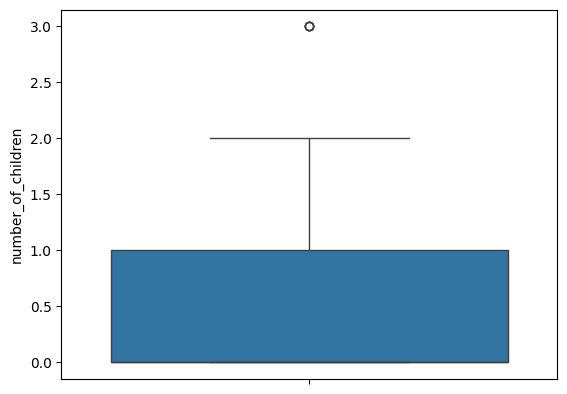

In [36]:
sns.boxplot(df['number_of_children'])

##### Since the max amount of children is 3 in our data and 3 is not an unusual number of children to have as a parent, we will disregard the above plot for potential outlier 

<Axes: ylabel='count'>

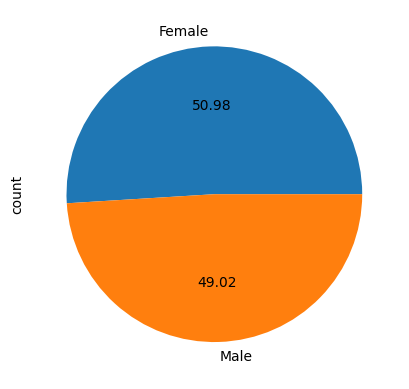

In [38]:
# Creating Pie Chart

df['gender'].value_counts().plot(kind='pie', autopct='%.2f')


##### Our dataset is almost balanced in terms of gender

<Axes: ylabel='count'>

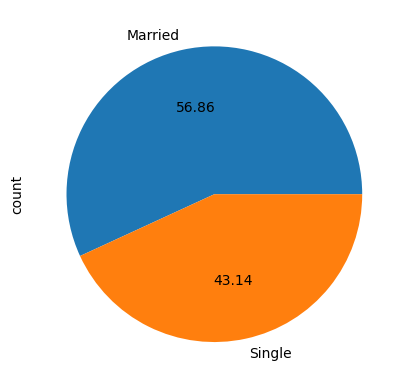

In [40]:
df['marital_status'].value_counts().plot(kind='pie', autopct='%.2f')

##### There is a cleary majority of married individuals in the dataset

<Axes: ylabel='count'>

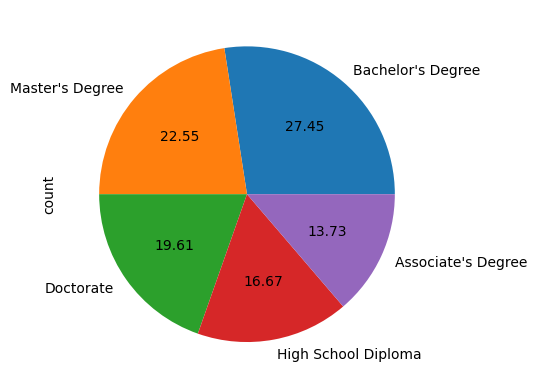

In [42]:
# Plotting education 
df['education'].value_counts().plot(kind='pie', autopct='%.2f') # Pie plot


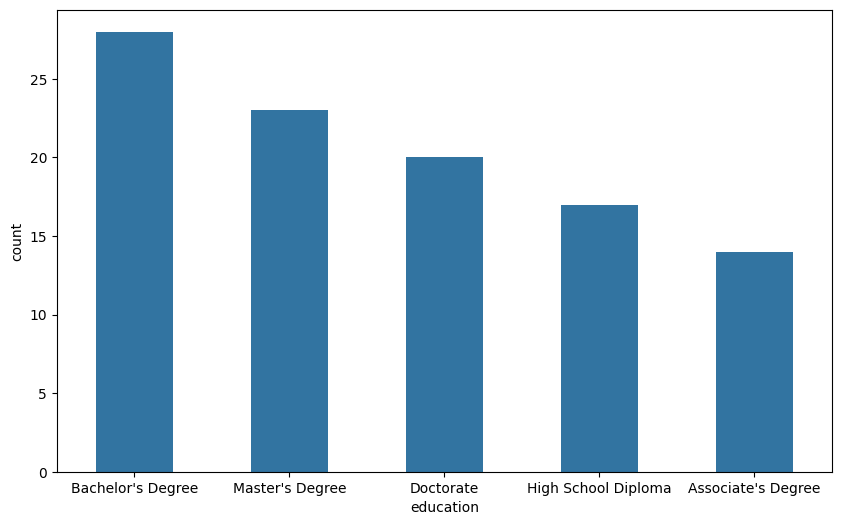

In [43]:
# Count plot
plt.figure(figsize=(10,6))
sns.countplot(data = df, x = 'education', width=0.5)
plt.show()

##### Group of the individuals having Bachelor's Degree are in majority as compared to any other degrees. 

Top 3 education level in our data :
- Bachelor's 
- Master's
- Doctorate

<Axes: ylabel='count'>

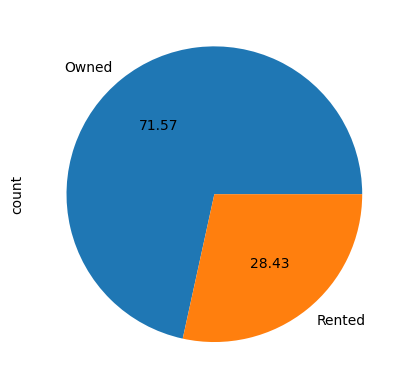

In [45]:
df['home_ownership'].value_counts().plot(kind='pie', autopct='%.2f') # Pie plot

##### Majority of our individuals live in their own home instead of renting it

<Axes: ylabel='count'>

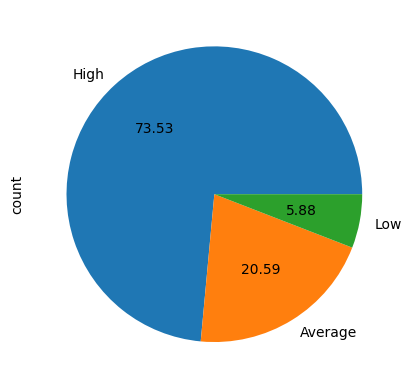

In [47]:
df['credit_score'].value_counts().plot(kind='pie', autopct='%.2f') # Pie plot

##### Our dataset has imbalance distribution of credit score 
##### Most of the individuals have 'high' credit score
##### Only 1/4 of individuals in our dataset lies under "Average" / "Low" credit score

#### Bivariate / Multi- Variate analysis

<Axes: xlabel='home_ownership', ylabel='income'>

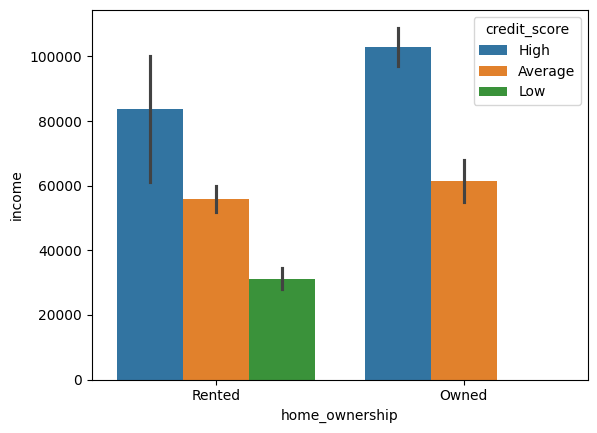

In [50]:
sns.barplot(data=df, x='home_ownership', y = 'income', hue='credit_score')

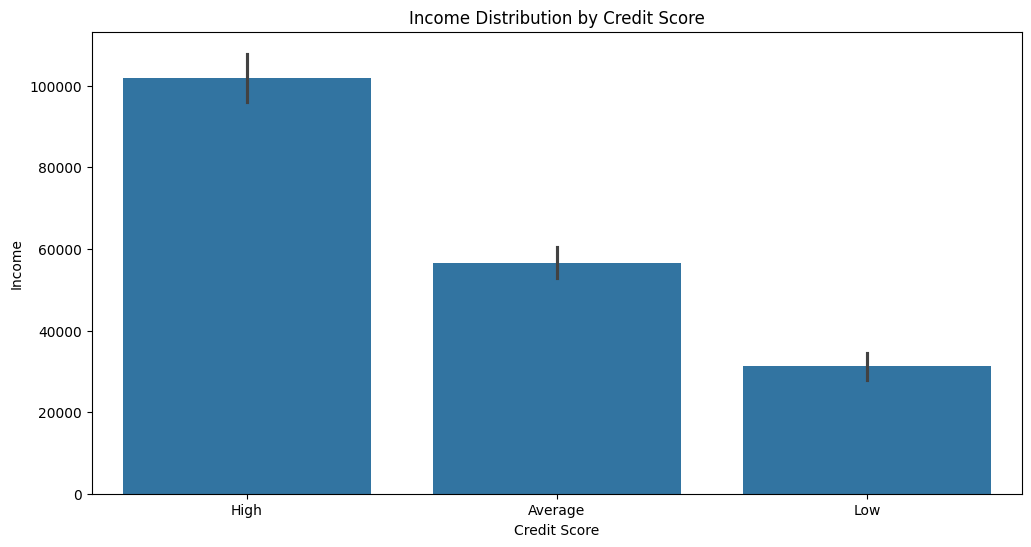

In [51]:
plt.figure(figsize=(12, 6))
sns.barplot(x='credit_score', y='income', data=df)
plt.title('Income Distribution by Credit Score')
plt.ylabel('Income')
plt.xlabel('Credit Score')
plt.show()


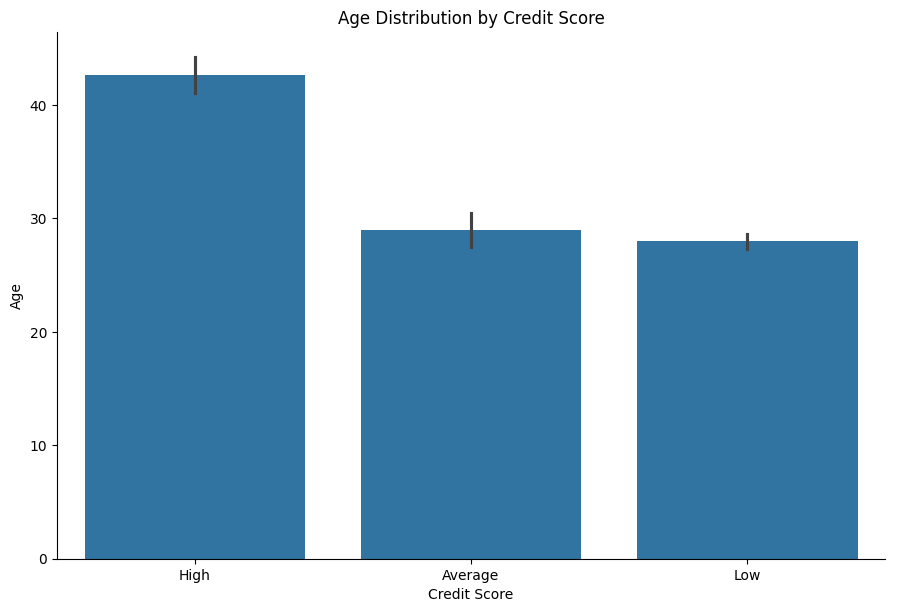

In [52]:
sns.catplot(x='credit_score', y='age', kind='bar', data=df, height=6, aspect=1.5)
plt.title('Age Distribution by Credit Score')
plt.xlabel('Credit Score')
plt.ylabel('Age')
plt.show()

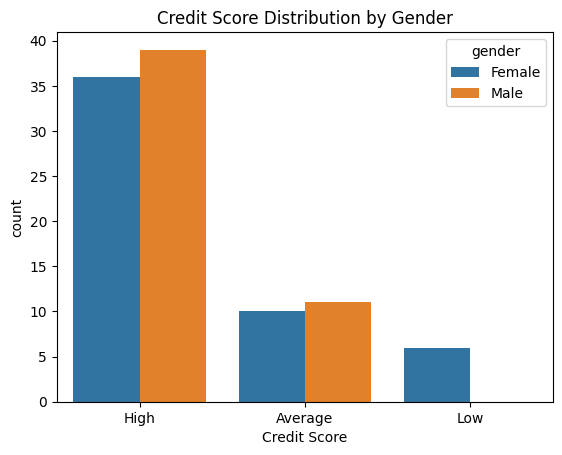

In [53]:
sns.countplot(x='credit_score', hue='gender', data=df)
plt.title('Credit Score Distribution by Gender')
plt.xlabel('Credit Score')
plt.show()

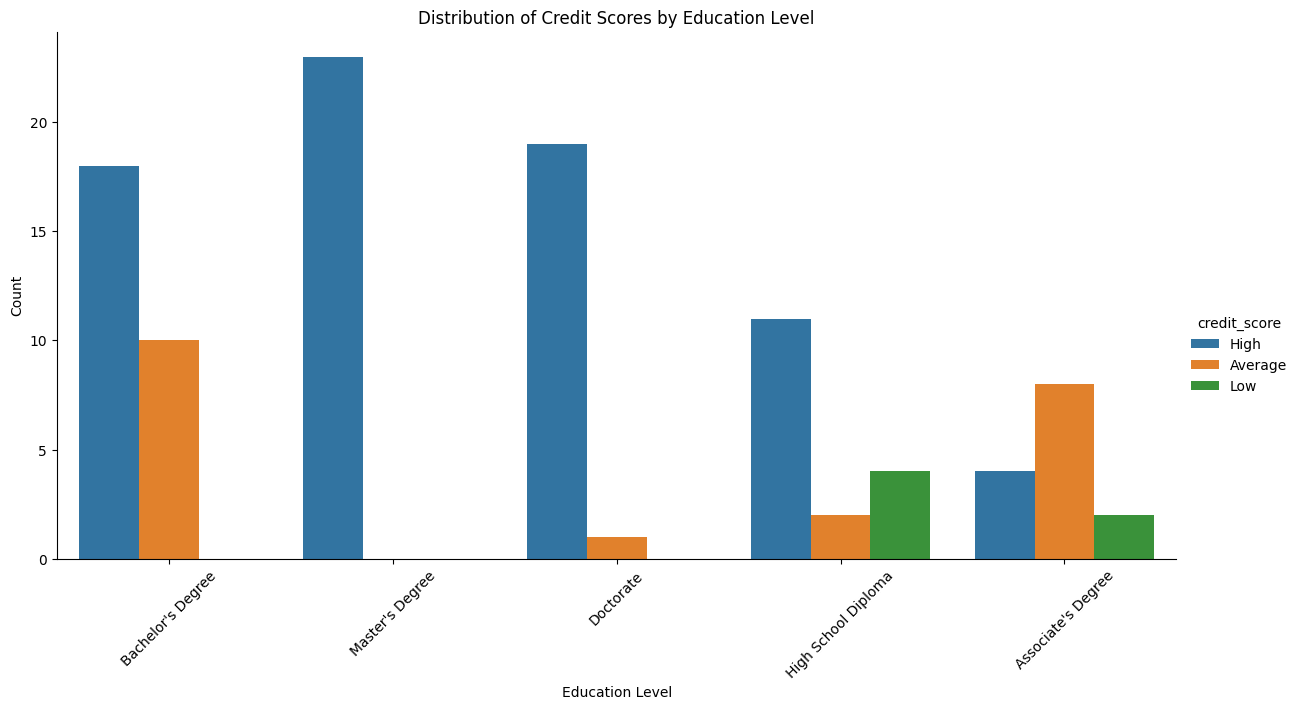

In [54]:
sns.catplot(x='education', kind='count', hue='credit_score', data=df, height=6, aspect=2)
plt.title('Distribution of Credit Scores by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

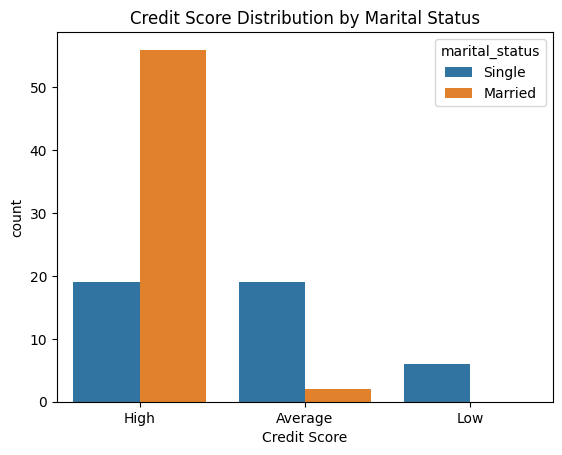

In [55]:
sns.countplot(x='credit_score', hue='marital_status', data=df)
plt.title('Credit Score Distribution by Marital Status')
plt.xlabel('Credit Score')
plt.show()

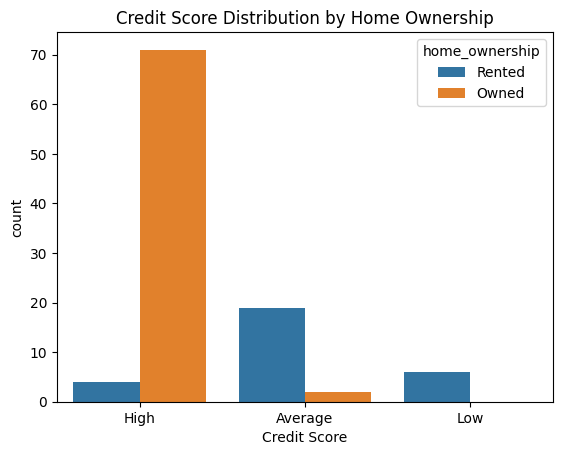

In [56]:
sns.countplot(x='credit_score', hue='home_ownership', data=df)
plt.title('Credit Score Distribution by Home Ownership')
plt.xlabel('Credit Score')
plt.show()

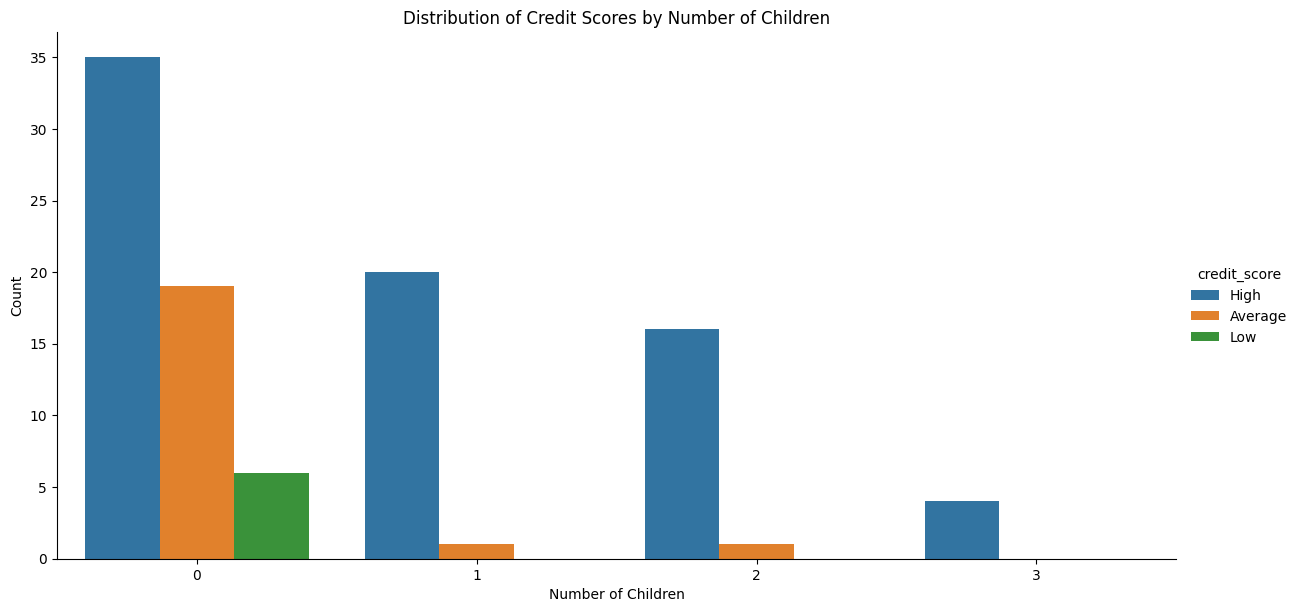

In [57]:
sns.catplot(x='number_of_children', kind='count', hue='credit_score', data=df, height=6, aspect=2)
plt.title('Distribution of Credit Scores by Number of Children')
plt.xlabel('Number of Children')
plt.ylabel('Count')
plt.show()

## EDA Questions

##### Age:
- Older individuals tend to have higher credit scores.
- This could be due to more established credit histories and better financial management over time.

##### Gender:
- There is no significant difference in credit scores between different genders.
- Both males and females are represented across all credit score categories.

#### Income:
- Higher income is associated with higher credit scores.
- Individuals with higher incomes tend to have better financial stability and credit management.

#### Marital Status:
- Married individuals tend to have higher credit scores.
- Single or divorced individuals are more represented in the lower credit score categories.

#### Home Ownership:
- Homeowners tend to have higher credit scores.
- Non-homeowners (e.g., renters) are more represented in the lower credit score categories.

#### Education:
- Higher education levels are associated with higher credit scores.
- Individuals with higher education tend to have better financial literacy and credit management.

#### Number of Children:
- There is no significant trend observed between the number of children and credit scores.
- Individuals with different numbers of children are represented across all credit score categories.


#### Conclusion:
- The analysis reveals that factors such as age, income, marital status, home ownership, and education level have a significant impact on credit scores.
- Older individuals, those with higher incomes, married individuals, homeowners, and those with higher education levels tend to have higher credit scores.
- Gender and the number of children do not show significant trends in relation to credit scores. These insights highlight the importance of financial stability, education, and life circumstances in credit management and financial health.

#### Perfoming Chi-Square Test on the categorical features

In [62]:
ct_gender = pd.crosstab(df['gender'], df['credit_score'])
chi2, p, dof, ex = chi2_contingency(ct_gender)
print(p) 

0.04663610652284899


In [63]:
ct_education = pd.crosstab(df['education'], df['credit_score'])
chi2, p, dof, ex = chi2_contingency(ct_education)
print(p) 

1.0477064844829997e-06


In [64]:
ct_marital = pd.crosstab(df['marital_status'], df['credit_score'])
chi2, p, dof, ex = chi2_contingency(ct_marital)
print(p) 

1.0277125101544082e-08


In [65]:
ct_home = pd.crosstab(df['home_ownership'], df['credit_score'])
chi2, p, dof, ex = chi2_contingency(ct_home)
print(p) 

6.653814202717026e-17


#### Finding out correlation for numerical columns

In [67]:
df.corr(numeric_only=True)

,age,income,number_of_children
age,1.000000,0.731797,0.019404
income,0.731797,1.000000,-0.009786
number_of_children,0.019404,-0.009786,1.000000


## DATA PRE PROCESSING

In [69]:
# Splitting the data
X = df.drop('credit_score', axis=1)
y = df['credit_score']

In [70]:
X.shape

(102, 7)

In [71]:
y.shape

(102,)

In [72]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, LabelEncoder

In [73]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=69)

In [74]:
preprocessoor = ColumnTransformer(transformers=[
    ('ohe', OneHotEncoder(sparse_output=False, drop='first'), ['gender', 'marital_status', 'home_ownership']),
    ('ordinal', OrdinalEncoder(categories=[["Associate's Degree", "High School Diploma", "Bachelor's Degree", "Master's Degree", "Doctorate"]]), ['education'])
], remainder= 'passthrough')

In [75]:
X_train_transformed = preprocessoor.fit_transform(X_train)
X_train_transformed.shape

(71, 7)

In [76]:
X_test_transformed = preprocessoor.transform(X_test)

In [77]:
preprocessoor.transform(X_test).shape

(31, 7)

In [78]:
X_train_transformed

array([[1.000e+00, 0.000e+00, 0.000e+00, 3.000e+00, 5.000e+01, 1.550e+05,
        0.000e+00],
       [1.000e+00, 0.000e+00, 0.000e+00, 3.000e+00, 3.000e+01, 1.000e+05,
        2.000e+00],
       [0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 4.600e+01, 9.750e+04,
        1.000e+00],
       [0.000e+00, 0.000e+00, 0.000e+00, 2.000e+00, 4.500e+01, 1.100e+05,
        3.000e+00],
       [0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 4.600e+01, 1.025e+05,
        1.000e+00],
       [1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 5.300e+01, 1.225e+05,
        0.000e+00],
       [0.000e+00, 0.000e+00, 0.000e+00, 4.000e+00, 4.800e+01, 8.750e+04,
        1.000e+00],
       [0.000e+00, 0.000e+00, 0.000e+00, 2.000e+00, 4.500e+01, 1.000e+05,
        3.000e+00],
       [1.000e+00, 1.000e+00, 1.000e+00, 2.000e+00, 3.100e+01, 6.000e+04,
        0.000e+00],
       [1.000e+00, 0.000e+00, 0.000e+00, 2.000e+00, 5.100e+01, 1.400e+05,
        0.000e+00],
       [1.000e+00, 1.000e+00, 0.000e+00, 1.000e+00, 4.000e+0

In [79]:
# Label encoding 
label_encoder = LabelEncoder()
label_encoder.fit(y_train)

LabelEncoder()

In [80]:
y_train_encoded = label_encoder.transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

In [81]:
y_train_encoded

array([1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 2, 1, 1, 1, 1, 0, 1, 0,
       2, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 2, 0, 0, 1, 2, 1, 1, 1, 2, 0, 1, 2, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0])

In [82]:
y_test_encoded

array([1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0])

#### Scaling the data

In [84]:
# Importing scaler
from sklearn.preprocessing import StandardScaler

In [85]:
scaler = StandardScaler()

In [86]:
X_train_scaled = scaler.fit_transform(X_train_transformed)

In [87]:
X_test_scaled = scaler.transform(X_test_transformed)

In [88]:
X_test_scaled

array([[ 1.07308674,  1.04318517, -0.69221866,  0.75959875,  0.44592278,
         0.58374105, -0.70362388],
       [-0.93189112, -0.95860259, -0.69221866,  1.55270922, -0.34277338,
        -0.16599872,  0.38240428],
       [ 1.07308674,  1.04318517,  1.44463024, -1.61973264, -0.68078602,
        -0.91573849, -0.70362388],
       [ 1.07308674,  1.04318517, -0.69221866,  1.55270922,  0.3332519 ,
         1.03358491, -0.70362388],
       [-0.93189112, -0.95860259, -0.69221866, -0.03351171,  0.78393542,
         0.58374105,  2.55446062],
       [-0.93189112, -0.95860259, -0.69221866,  0.75959875, -0.2301025 ,
        -0.16599872,  1.46843245],
       [-0.93189112, -0.95860259, -0.69221866, -0.03351171,  0.10791014,
        -0.76579054,  1.46843245],
       [ 1.07308674, -0.95860259, -0.69221866, -0.82662217,  1.57263158,
         1.55840275, -0.70362388],
       [ 1.07308674, -0.95860259,  1.44463024, -0.03351171, -0.45544426,
         0.58374105,  0.38240428],
       [-0.93189112, -0.9586

In [89]:
X_train_scaled

array([[ 1.07308674, -0.95860259, -0.69221866,  0.75959875,  1.34728982,
         2.08322059, -0.70362388],
       [ 1.07308674, -0.95860259, -0.69221866,  0.75959875, -0.90612778,
         0.4337931 ,  1.46843245],
       [-0.93189112, -0.95860259, -0.69221866, -0.82662217,  0.8966063 ,
         0.35881912,  0.38240428],
       [-0.93189112, -0.95860259, -0.69221866, -0.03351171,  0.78393542,
         0.733689  ,  2.55446062],
       [-0.93189112, -0.95860259, -0.69221866, -0.82662217,  0.8966063 ,
         0.50876707,  0.38240428],
       [ 1.07308674, -0.95860259, -0.69221866, -1.61973264,  1.68530246,
         1.10855889, -0.70362388],
       [-0.93189112, -0.95860259, -0.69221866,  1.55270922,  1.12194806,
         0.05892321,  0.38240428],
       [-0.93189112, -0.95860259, -0.69221866, -0.03351171,  0.78393542,
         0.4337931 ,  2.55446062],
       [ 1.07308674,  1.04318517,  1.44463024, -0.03351171, -0.7934569 ,
        -0.76579054, -0.70362388],
       [ 1.07308674, -0.9586

#### Oversampling the data using SMOTE

In [91]:
from imblearn.over_sampling import SMOTE


smote = SMOTE(random_state=69, k_neighbors=2 )

X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train_encoded)


In [92]:
y_train_resampled.shape

(144,)

In [93]:
y_train_encoded.shape

(71,)

## Logistic Regression

In [95]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

In [96]:
clf = LogisticRegression()

clf.fit(X_train_resampled, y_train_resampled)

y_pred = clf.predict(X_test_scaled)

print(classification_report(y_test_encoded, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test_encoded, y_pred))
accuracy = accuracy_score(y_test_encoded, y_pred)
print(f'Accuracy: {accuracy:.2f}')

              precision    recall  f1-score   support

           0       0.60      0.75      0.67         4
           1       1.00      0.93      0.96        27
           2       0.00      0.00      0.00         0

    accuracy                           0.90        31
   macro avg       0.53      0.56      0.54        31
weighted avg       0.95      0.90      0.92        31

Confusion Matrix:
[[ 3  0  1]
 [ 2 25  0]
 [ 0  0  0]]
Accuracy: 0.90


C:\Users\skyna\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\skyna\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\skyna\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


## Random Forest

In [98]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [99]:
rf = RandomForestClassifier(n_estimators=200, random_state=60)

rf.fit(X_train_resampled, y_train_resampled)

y_pred = rf.predict(X_test_scaled)

print(classification_report(y_test_encoded, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test_encoded, y_pred))
accuracy = accuracy_score(y_test_encoded, y_pred)
print(f'Accuracy: {accuracy:.2f}')

              precision    recall  f1-score   support

           0       0.75      0.75      0.75         4
           1       1.00      0.96      0.98        27
           2       0.00      0.00      0.00         0

    accuracy                           0.94        31
   macro avg       0.58      0.57      0.58        31
weighted avg       0.97      0.94      0.95        31

Confusion Matrix:
[[ 3  0  1]
 [ 1 26  0]
 [ 0  0  0]]
Accuracy: 0.94


C:\Users\skyna\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\skyna\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\skyna\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


## XG Boost

In [101]:
import xgboost as xgb

In [102]:
xgb_classifier = xgb.XGBClassifier(random_state=69)

xgb_classifier.fit(X_train_resampled, y_train_resampled)

y_pred = xgb_classifier.predict(X_test_scaled)


print("Classification Report:")
print(classification_report(y_test_encoded, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test_encoded, y_pred))
accuracy = accuracy_score(y_test_encoded, y_pred)
print(f'Accuracy: {accuracy:.2f}')


Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.75      0.86         4
           1       1.00      1.00      1.00        27
           2       0.00      0.00      0.00         0

    accuracy                           0.97        31
   macro avg       0.67      0.58      0.62        31
weighted avg       1.00      0.97      0.98        31

Confusion Matrix:
[[ 3  0  1]
 [ 0 27  0]
 [ 0  0  0]]
Accuracy: 0.97


C:\Users\skyna\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\skyna\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\skyna\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


## Decision Tress

In [104]:
from sklearn.tree import DecisionTreeClassifier

In [105]:
dt_classifier = DecisionTreeClassifier(random_state=42)

dt_classifier.fit(X_train_resampled, y_train_resampled)

y_pred = dt_classifier.predict(X_test_scaled)

print("Classification Report:")
print(classification_report(y_test_encoded, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test_encoded, y_pred))
accuracy = accuracy_score(y_test_encoded, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.75      0.75         4
           1       1.00      0.96      0.98        27
           2       0.00      0.00      0.00         0

    accuracy                           0.94        31
   macro avg       0.58      0.57      0.58        31
weighted avg       0.97      0.94      0.95        31

Confusion Matrix:
[[ 3  0  1]
 [ 1 26  0]
 [ 0  0  0]]
Accuracy: 0.94


C:\Users\skyna\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\skyna\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\skyna\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


## SVC 

In [107]:
from sklearn.svm import SVC

In [108]:
svm_classifier = SVC(kernel='rbf', random_state=69)

svm_classifier.fit(X_train_resampled, y_train_resampled)

y_pred = svm_classifier.predict(X_test_scaled)

print("Classification Report:")
print(classification_report(y_test_encoded, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test_encoded, y_pred))
accuracy = accuracy_score(y_test_encoded, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.75      0.75         4
           1       1.00      0.96      0.98        27
           2       0.00      0.00      0.00         0

    accuracy                           0.94        31
   macro avg       0.58      0.57      0.58        31
weighted avg       0.97      0.94      0.95        31

Confusion Matrix:
[[ 3  0  1]
 [ 1 26  0]
 [ 0  0  0]]
Accuracy: 0.94


C:\Users\skyna\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\skyna\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\skyna\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


## Cross Validation of Model

In [110]:
from sklearn.model_selection import cross_val_score

In [111]:
scores = cross_val_score(svm_classifier, X_train_resampled, y_train_resampled, cv=5)

print("Cross-validation scores:", scores)
print(f"Mean cross-validation score for SVC: {np.mean(scores)}")

Cross-validation scores: [0.96551724 0.79310345 0.93103448 0.93103448 0.92857143]
Mean cross-validation score for SVC: 0.9098522167487685


In [112]:
scores = cross_val_score(clf, X_train_resampled, y_train_resampled, cv=5)

print("Cross-validation scores:", scores)
print(f"Mean cross-validation score for Logistic Regression: {np.mean(scores)}")

Cross-validation scores: [1.         0.89655172 1.         1.         0.96428571]
Mean cross-validation score for Logistic Regression: 0.972167487684729


In [113]:
scores = cross_val_score(xgb_classifier, X_train_resampled, y_train_resampled, cv=5)

print("Cross-validation scores:", scores)
print(f"Mean cross-validation score for XG Boost: {np.mean(scores)}")

Cross-validation scores: [1.         0.89655172 1.         1.         1.        ]
Mean cross-validation score for XG Boost: 0.9793103448275862


In [114]:
scores = cross_val_score(dt_classifier, X_train_resampled, y_train_resampled, cv=5)

print("Cross-validation scores:", scores)
print(f"Mean cross-validation score for Decision Tree: {np.mean(scores)}")

Cross-validation scores: [1.         0.93103448 1.         0.96551724 1.        ]
Mean cross-validation score for Decision Tree: 0.9793103448275862


In [115]:
scores = cross_val_score(rf, X_train_resampled, y_train_resampled, cv=5)

print("Cross-validation scores:", scores)
print(f"Mean cross-validation score for Random Forest: {np.mean(scores)}")

Cross-validation scores: [1.         0.93103448 1.         1.         1.        ]
Mean cross-validation score for Random Forest: 0.9862068965517242


#### Conclusion :
##### Our model, the Random Forest Classifier, got scores like 1.0, 0.93, and 1.0 when we tested it with different parts of our data. The average of these scores, which is about 0.986, shows how well the model can predict things correctly. It means our model is very good at guessing right most of the time.
##### But since the dataset that we used to create the model has very limited amouunt of records, there might be a chance that our model has become overfit

In [117]:
import pickle

In [118]:
with open(r'C:\Users\skyna\OneDrive\Desktop\Capstone\Model\rfmodel.pkl', 'wb') as f:
    pickle.dump(rf, f)